In [107]:
import pytesseract  # pip install pytesseract
import numpy as np
import cv2 # OpenCV
from IPython.display import display
from PIL import Image, ImageFont
import matplotlib.pyplot as plt
from pytesseract import Output

In [108]:
def display_image(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))
    return img_rgb

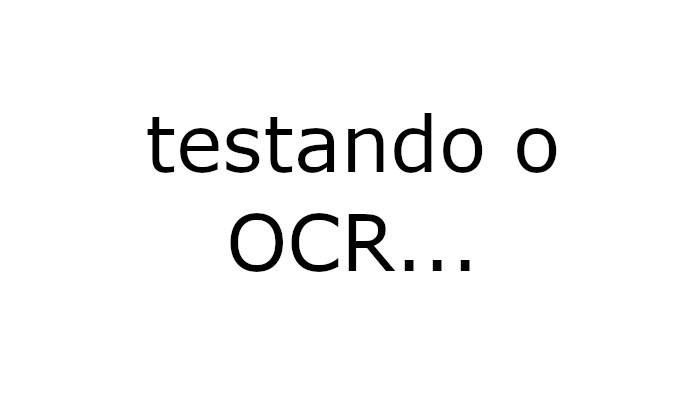

In [109]:
img = cv2.imread('../recursos/images/teste01.jpg')
img = display_image(img)

In [110]:
texto = pytesseract.image_to_string(img)
print(texto)

testando o
OCR...



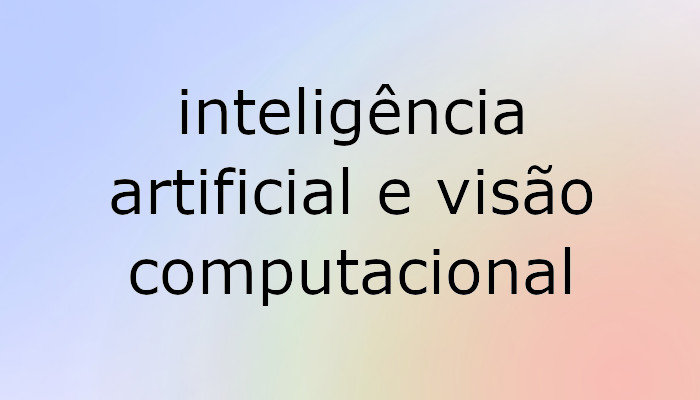

In [111]:
img = cv2.imread('../recursos/images/teste02.jpg')
img = display_image(img)

In [112]:
# sudo apt-get install tesseract-ocr-por
# wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



Page segmentation modes (PSM)

In [113]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


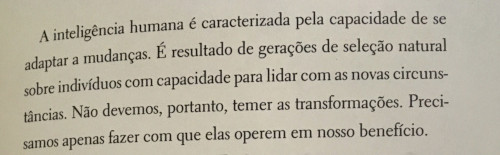

In [114]:
img2 = cv2.imread('../recursos/images/trecho-livro.jpg')
img2 = display_image(img2)

In [115]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(img2, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



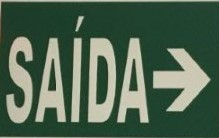

SAÍDA>



In [116]:
img3 = cv2.imread('../recursos/images/saida.jpg')
img3 = display_image(img3)
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(img3, lang='por', config=config_tesseract)
print(texto)

Detecção de orientação da página

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso bencfício.

Há um papel a ser desempenhado por todos para garantir que
nossa geração e a próxima tenham não apenas a oportunidade,
mas também a determinação de nos dedicar plenamente ao es-
tudo da ciência, de modo a conseguir consumar nosso potencial
ecriar um mundo melhor para toda a raça humana. Precisamos
levar o aprendizado para além de uma discussão teórica sobre
como a IA deve ser e assegurar o planejamento de como ela pode
ser, Todos nós temos potencial para expandir as fronteiras do que
é aceito, ou esperado, e para pensar grande. Estamos às portas
de um admirável m

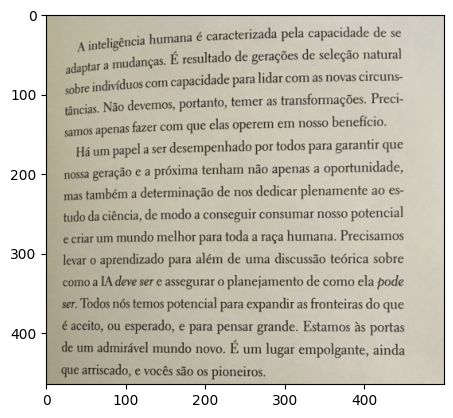

In [117]:
img = Image.open('../recursos/images/livro01.jpg')
plt.imshow(img);
print(pytesseract.image_to_osd(img))

img3 = cv2.imread('../recursos/images/livro01.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(img3, lang='por', config=config_tesseract)
print(texto)

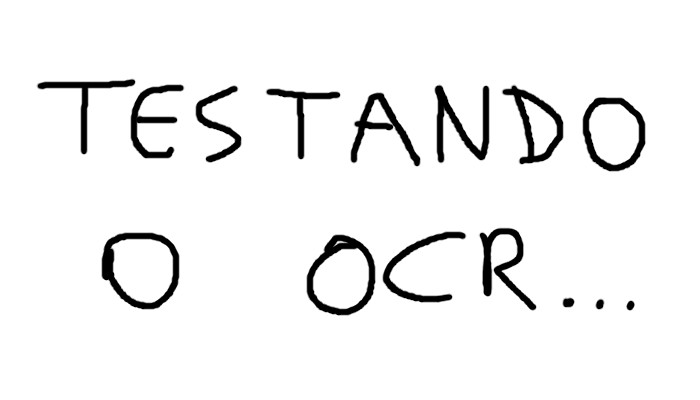

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 90, -1, 74, 66],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [118]:
img4 = cv2.imread('../recursos/images/teste_manuscrito_01.jpg')
img4 = display_image(img4)
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(img4, config=config_tesseract, lang='por', output_type=pytesseract.Output.DICT)
resultado

* block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

* conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

* height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

* left = coordenada x onde inicia a caixa delimitadora

* level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
    1. página
    2. bloco
    3. parágrafo
    4. linha
    5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

* line_num = número da linha do que foi detectado (inicia com 0)

* page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

* text = o resultado do reconhecimento

* top = coordenada y onde a caixa delimitadora começa

* width = largura do bloco de texto atual detectado

* word_num = numero da palavra (indice) dentro do bloco atual



In [119]:
min_conf = 40   # confiança mínima

In [120]:
# Vamos percorrer as detecções e percobrer os textos com confiança alta
def caixa_texto(resultado, indice, img, cor = (255, 100, 0)):
  x = resultado['left'][indice]
  y = resultado['top'][indice]
  w = resultado['width'][indice]
  h = resultado['height'][indice]
  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
  return x, y, img

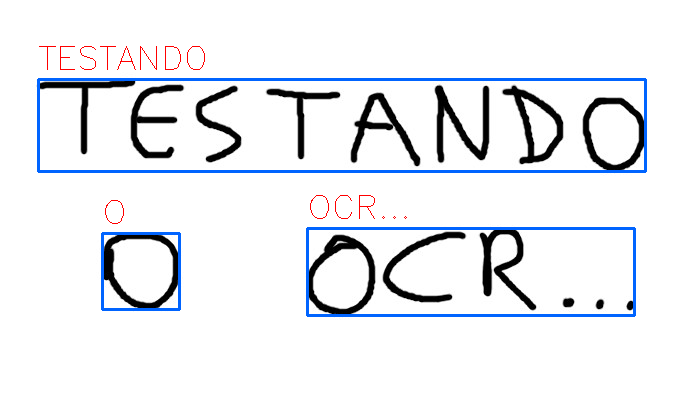

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [121]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, i, img_copia)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))

display_image(img_copia)

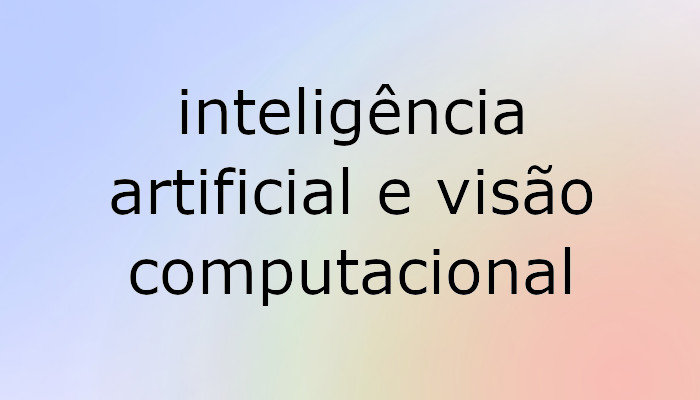

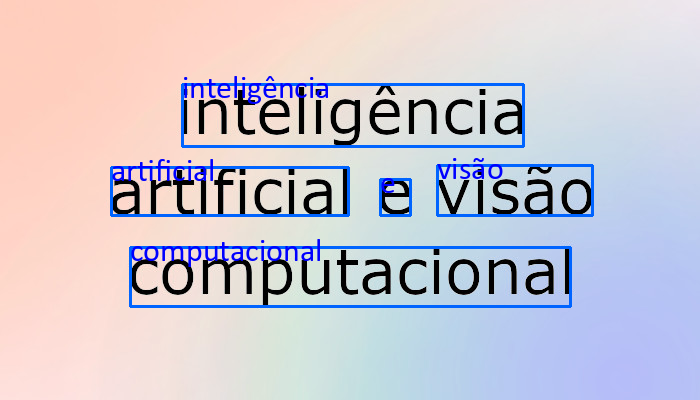

array([[[255, 206, 190],
        [255, 206, 190],
        [254, 205, 189],
        ...,
        [239, 232, 239],
        [239, 232, 239],
        [239, 232, 239]],

       [[255, 206, 190],
        [255, 206, 190],
        [254, 205, 189],
        ...,
        [239, 232, 239],
        [239, 232, 239],
        [239, 232, 239]],

       [[255, 206, 190],
        [255, 206, 190],
        [254, 205, 189],
        ...,
        [239, 232, 239],
        [239, 232, 239],
        [239, 232, 239]],

       ...,

       [[254, 225, 221],
        [254, 225, 221],
        [254, 225, 221],
        ...,
        [182, 193, 245],
        [183, 194, 246],
        [183, 194, 244]],

       [[254, 225, 221],
        [254, 225, 221],
        [254, 225, 221],
        ...,
        [182, 193, 245],
        [183, 194, 246],
        [183, 194, 244]],

       [[254, 225, 221],
        [254, 225, 221],
        [254, 225, 221],
        ...,
        [182, 193, 245],
        [183, 194, 246],
        [183, 194, 244]]

In [122]:
from PIL import Image, ImageDraw, ImageFont

class OverlawText():

  min_conf = 40   # confiança mínima
  font_dir = '../recursos/Fontes/calibri.ttf'
  
  def open_image(self, path):
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(image_rgb))
    return image_rgb

  def detect_text_in_image(self, image_rgb):
    config_tesseract = '--tessdata-dir tessdata'
    resultado = pytesseract.image_to_data(image_rgb, config=config_tesseract, lang='por', output_type=pytesseract.Output.DICT)
    return resultado

  def write_overlays_in_image(self, resultado, img, min_conf):
    img_copia = img.copy()
    for i in range(0, len(resultado['text'])):
      confianca = int(resultado['conf'][i])
      if confianca > min_conf:
        x, y, img = caixa_texto(resultado, i, img_copia)
        texto = resultado['text'][i]
        img_copia = self.write_text_in_overlay(texto, x, y - 10, img_copia, self.font_dir)
    return img_copia

  def write_text_in_overlay(self, texto, x, y, img, fonte, tamanho_texto=32):
    font = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y), texto, font=font, fill=(255, 0, 0, 0))
    return np.array(img_pil)
  
  def display_image(self, image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))
    return img_rgb
  
  def scan(self, path):
    image = self.open_image(path)
    resultado = self.detect_text_in_image(image)
    return self.write_overlays_in_image(resultado, image, self.min_conf)


overlaw = OverlawText()
image = overlaw.scan('../recursos/images/teste02.jpg')
overlaw.display_image(image)


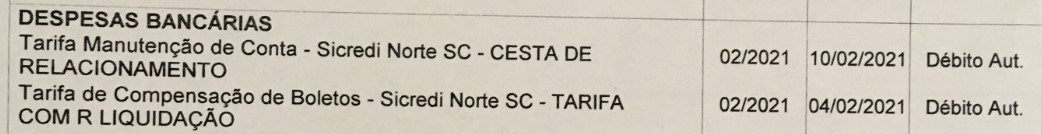

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [123]:
import re

img = cv2.imread('../recursos/images/tabela_teste.jpg')
img = display_image(img)
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(img, config=config_tesseract, lang="por", output_type=pytesseract.Output.DICT)
resultado


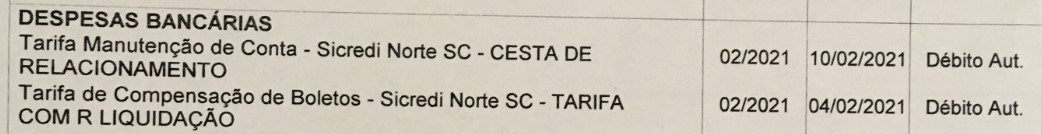

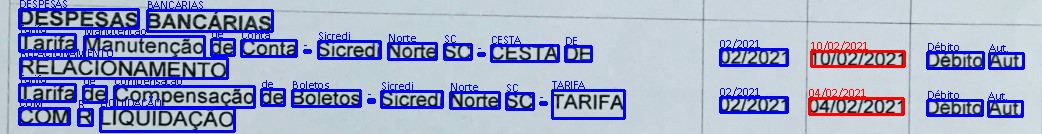

In [124]:

class ProcessImage():

    lang = 'por'
    psm = None
    min_conf = 40   # confiança mínima
    font_dir = '../recursos/Fontes/calibri.ttf'
    data_regex = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
    
    def draw_square(self, resultado, indice, img, cor = (255, 100, 0)):
        """ Faz o desenho do retanmgulo na imagem """
        x = resultado['left'][indice]
        y = resultado['top'][indice]
        w = resultado['width'][indice]
        h = resultado['height'][indice]
        cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
        return x, y, img

    def draw_text(self, texto, x, y, img, fonte, tamanho_texto=32, fill=(255, 0, 0, 0)):
        """ Faz o desenho do texto na imagem """
        font = ImageFont.truetype(fonte, tamanho_texto)
        img_pil = Image.fromarray(img)
        draw = ImageDraw.Draw(img_pil)
        draw.text((x, y), texto, font=font, fill=fill)
        return np.array(img_pil)

    def write_overlays_in_image(self, resultado, img, min_conf):
        """ Scaneia os textos encontrados na imagem e suas posições, cria uma caixa e desenha na imagem
        Coloca as datas em vermelho
        """
        datas = []
        img_copia = img.copy()
        for i in range(0, len(resultado['text'])):
            confianca = int(resultado['conf'][i])
            if confianca > min_conf:
                texto = resultado['text'][i]
                
                fill = (255, 0, 0, 0)       
                if re.match(self.data_regex, texto):
                    fill =  (0,0,255)
                    datas.append(texto)
                
                x, y, img = self.draw_square(resultado, i, img_copia, fill)
                img_copia = self.draw_text(texto, x, y - 10, img_copia, self.font_dir, 12, fill)
                
        return img_copia
    
    def scan(self, path):
        """ Faz o Scan na Imagem """
        image = self.open_image(path)
        resultado = self.detect_text_in_image(image)
        return self.write_overlays_in_image(resultado, image, self.min_conf)
    
    def display_image(self, image):
        """ Exibe a Imagem """
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(img_rgb))
    
    def open_image(self, path):
        """ Abre o arquivo da Imagem e converte para o RGB """
        image = cv2.imread(path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(image_rgb))
        return image_rgb

    def detect_text_in_image(self, image_rgb):
        """ Detecta os textos na imagem """
        psm = ''
        if self.psm:
            psm = f'--psm {self.psm}'
        config_tesseract = f'--tessdata-dir tessdata {psm}'
        resultado = pytesseract.image_to_data(image_rgb, config=config_tesseract, lang=self.lang, output_type=pytesseract.Output.DICT)
        return resultado

    

overlaw = ProcessImage()
image = overlaw.scan('../recursos/images/tabela_teste.jpg')
overlaw.display_image(image)

Detecção de texto em cenários naturais

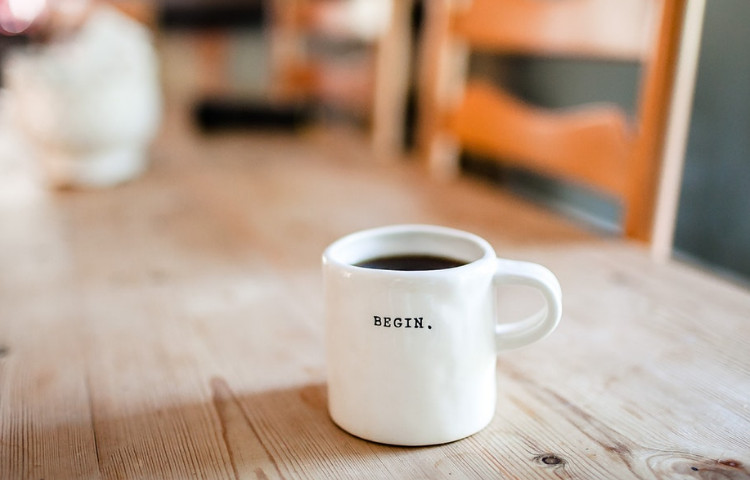

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0,
  0,
  0,
  0,
  0,
  374,
  374,
  374,
  374,
  169,
  169,
  169,
  169,
  287,
  287,
  287,
  287,
  360],
 'top': [0,
  0,
  0,
  0,
  25,
  316,
  316,
  316,
  316,
  397,
  397,
  397,
  397,
  404,
  404,
  404,
  444,
  399],
 'width': [750,
  642,
  642,
  642,
  54,
  58,
  58,
  58,
  58,
  69,
  69,
  69,
  69,
  178,
  178,
  178,
  28,
  52],
 'height': [480,
  161,
  161,
  161,
  64,
  13,
  13,
  13,
  13,
  83,
  83,
  83,
  83,
  61,
  61,
  61,
  21,
  77],
 'conf': [-1,
  -1,
  -1,
  -1,
  28,
  -1,
  -1,
  -1,
  86,
  -1,
  -1,
  -1,
  0,
  -1,


In [129]:
image = cv2.imread('../recursos/images/caneca.jpg')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))

config_tesseract = '--tessdata-dir tessdata --psm 11'
resultado = pytesseract.image_to_data(image_rgb, config=config_tesseract, lang='eng', output_type=pytesseract.Output.DICT)
resultado
    

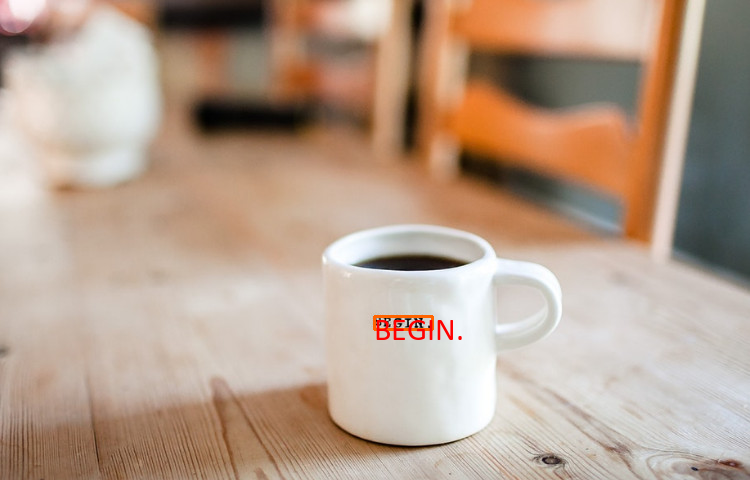

In [136]:
fonte = '../recursos/Fontes/calibri.ttf'

def caixa_texto(resultado, indice, img, cor = (255, 100, 0)):
  x = resultado['left'][indice]
  y = resultado['top'][indice]
  w = resultado['width'][indice]
  h = resultado['height'][indice]
  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
  return x, y, img

def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
    font = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y), texto, font=font, fill=(255, 0, 0, 0))
    return np.array(img_pil)
  
img = cv2.imread('../recursos/images/caneca.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

min_conf = 30 
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, i, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
      
      
display(Image.fromarray(img_copia))